In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("marketing_data.csv")

In [4]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,IND


In [5]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,9/1/12,99,169,...,4,7,0,1,1,0,0,1,0,CA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [7]:
df.columns = df.columns.str.replace(' ','')

df['Income'] = df['Income'].str.replace('$','')
df['Income'] = df['Income'].str.replace(',','').astype('float')

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [9]:
df.isnull().sum().sort_values(ascending = False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

Text(0, 0.5, 'count')

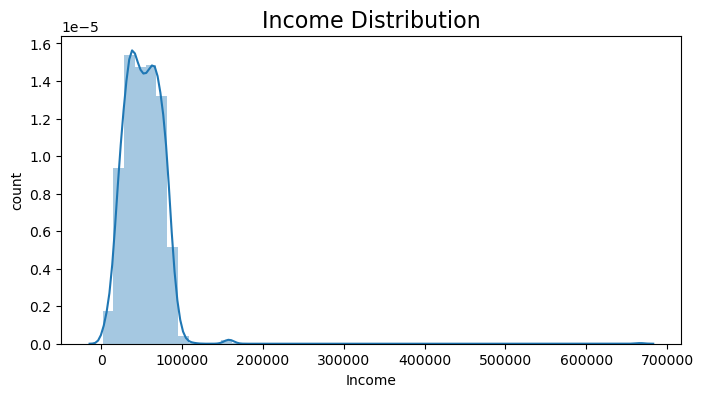

In [10]:
plt.figure(figsize=(8,4))
sns.distplot(df['Income'], kde = True, hist = True)
plt.title("Income Distribution", size = 16)
plt.ylabel('count')

<Axes: >

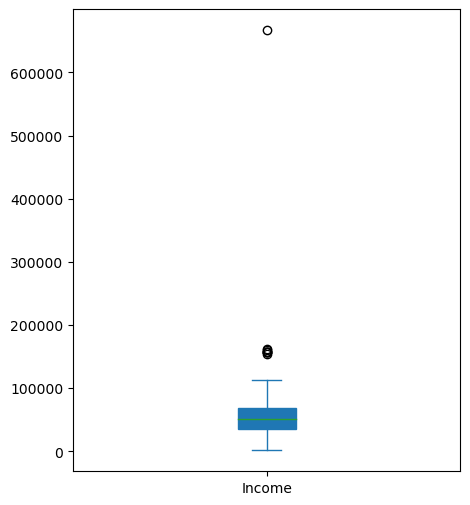

In [11]:
df['Income'].plot(kind = "box", figsize=(5,6), patch_artist = True)

In [12]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [13]:
df.isnull().sum().sort_values(ascending = False)

ID                     0
Year_Birth             0
Complain               0
Response               0
AcceptedCmp2           0
AcceptedCmp1           0
AcceptedCmp5           0
AcceptedCmp4           0
AcceptedCmp3           0
NumWebVisitsMonth      0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
NumDealsPurchases      0
MntGoldProds           0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Country                0
dtype: int64

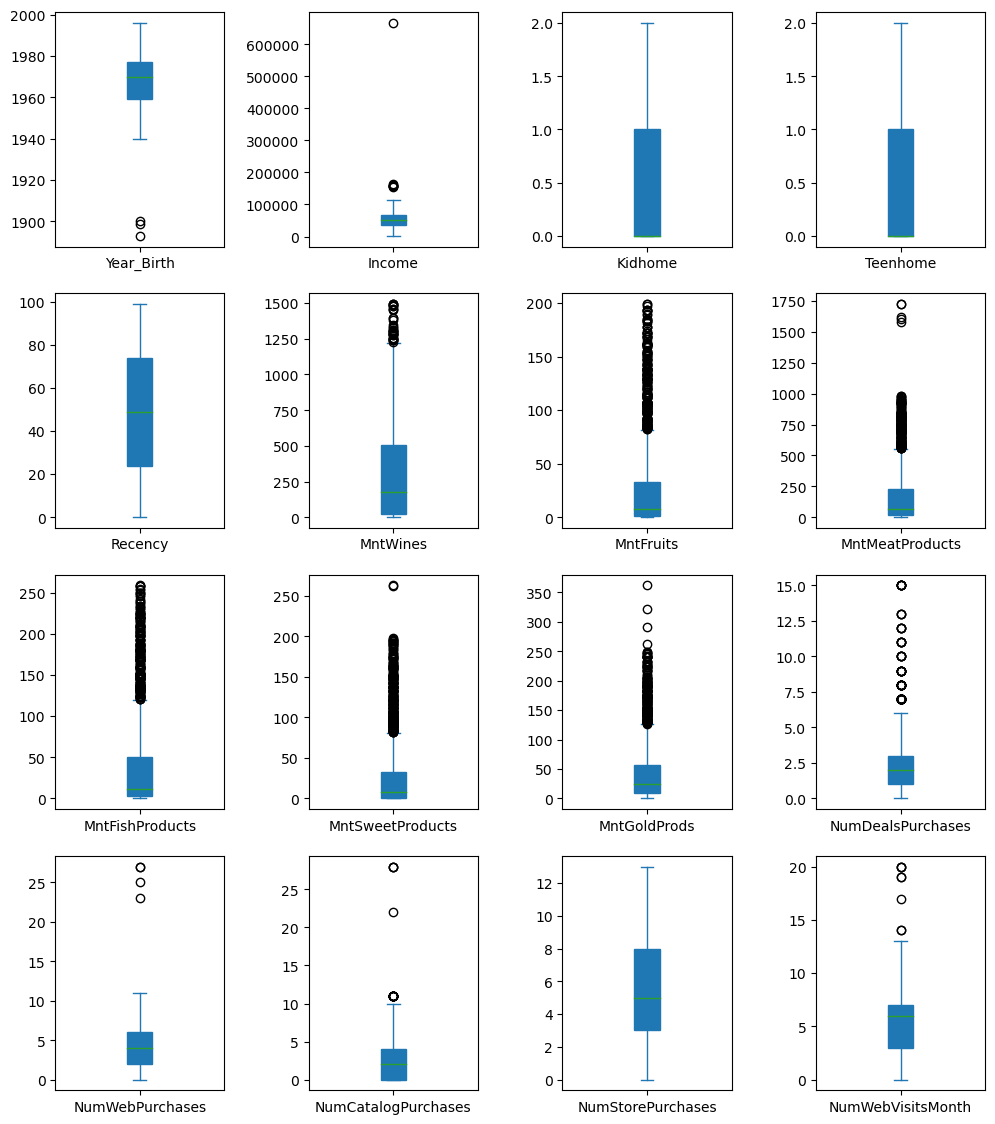

In [14]:
df_to_plot = df.drop(columns = ['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                                'Response', 'Complain']).select_dtypes(include = np.number)
df_to_plot.plot(subplots = True, kind = 'box', layout = (4,4), figsize = (12,14), patch_artist = True)
plt.subplots_adjust(wspace = 0.5)

<Axes: >

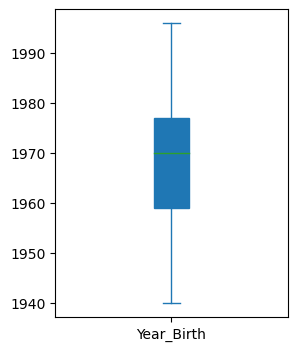

In [15]:
df = df[df['Year_Birth'] > 1900].reset_index(drop = True)
plt.figure(figsize=(3,4))
df['Year_Birth'].plot(kind = "box", patch_artist = True)

In [16]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [17]:
list(df.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

In [18]:
df['Dependents'] = df['Kidhome'] + df['Teenhome']

df['Year_Customer'] = pd.DatetimeIndex(df['Dt_Customer']).year

mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['TotalMnt'] = df[mnt_cols].sum(axis = 1)

purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['TotalPurchases'] = df[purchases_cols].sum(axis = 1)


campaings_col = [col for col in df.columns if 'Cmp' in col] + ['Response']
df['TotalCampaignsAcc'] = df[campaings_col].sum(axis = 1)

df[['ID','Dependents','Year_Customer','TotalMnt','TotalPurchases','TotalCampaignsAcc' ]].head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


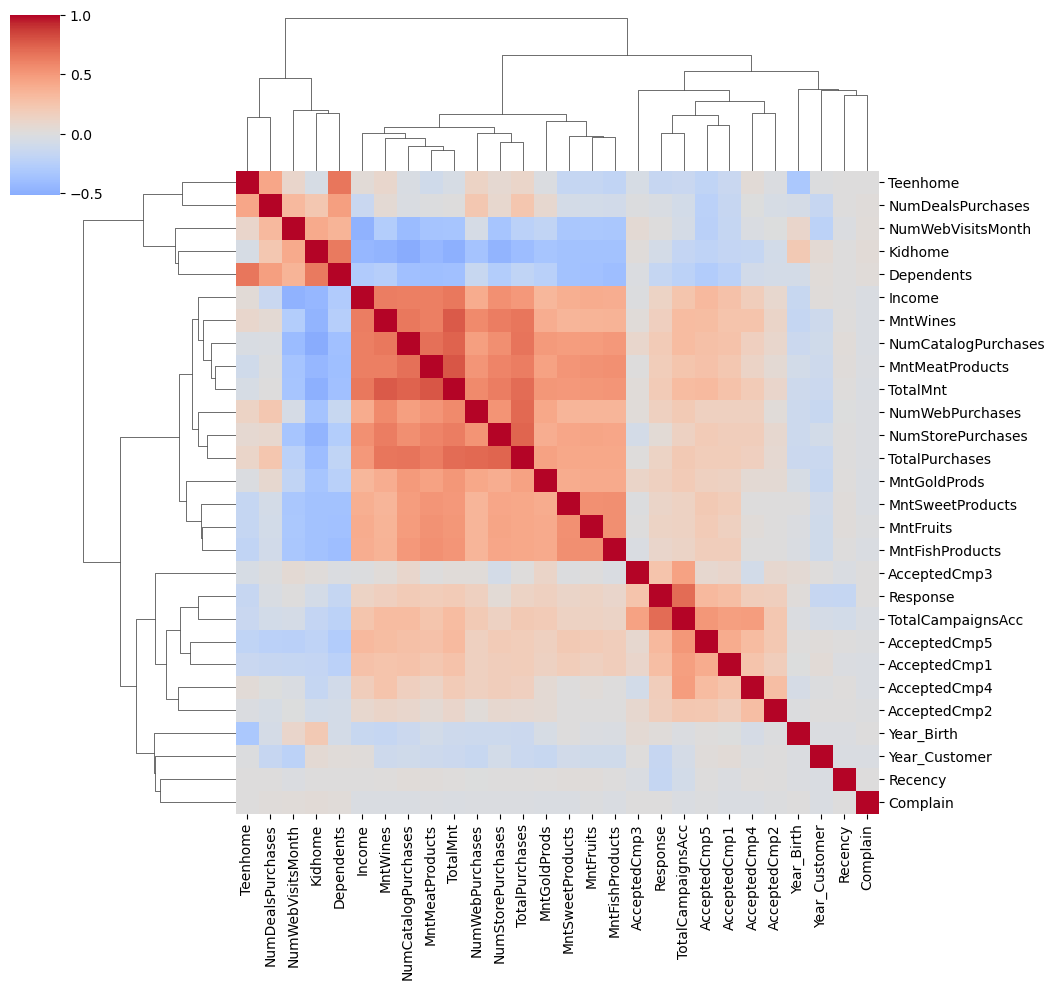

In [19]:
corrs = df.drop(columns = 'ID').select_dtypes(include = np.number).corr(method = 'kendall')
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap = 'coolwarm', center = 0)

In [20]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,1,0,SP,0,2014,1190,15,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,1,1,0,CA,0,2014,577,18,2
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,US,1,2014,251,11,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,AUS,2,2014,11,4,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,1,0,SP,1,2014,91,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,US,1,2013,689,20,0
2233,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,SP,1,2013,55,5,0
2234,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,0,SP,1,2012,309,14,0
2235,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,IND,0,2012,1383,20,0


In [23]:
pd.get_option('display.max_columns')

20

In [24]:
pd.set_option('display.max_columns', None)

In [27]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,0,2014,1190,15,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,0,2014,577,18,2
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,1,2014,251,11,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,2,2014,11,4,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,1,2014,91,8,2


In [28]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Dependents',
       'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc'],
      dtype='object')

In [37]:
#⦁	Older people are not as tech-savvy and probably prefer shopping in-store.

from scipy.stats import ttest_ind

current_year = pd.Timestamp.now().year
df['Ag'] = current_year - df['Year_Birth']

age_threshold = 50

older_customers = df[df['Ag'] >= age_threshold]
younger_customers = df[df['Ag'] >= age_threshold]

avg_web_purchases_older = older_customers['NumWebPurchases'].mean()
avg_store_purchases_older = older_customers['NumStorePurchases'].mean()

avg_web_purchases_younger = younger_customers['NumWebPurchases'].mean()
avg_store_purchases_younger = younger_customers['NumStorePurchases'].mean()

t_stat_web, p_web = ttest_ind(older_customers['NumWebPurchases'], younger_customers['NumWebPurchases'])
t_stat_store, p_store = ttest_ind(older_customers['NumStorePurchases'], younger_customers['NumStorePurchases'])

if p_web < 0.05:
    print("Older Customers make significently fewer web purchases")
else:
    print("There's no significant difference in the web Purchases between age groups")
    
if p_store < 0.05:
    print("Older Customers make significently fewer Store purchases")
else:
    print("There's no significant difference in the Store Purchases between age groups")

There's no significant difference in the web Purchases between age groups
There's no significant difference in the Store Purchases between age groups


In [48]:
#⦁	Customers with kids probably have less time to visit a store and would prefer to shop online.

customers_with_kids = df[df['Kidhome'] > 0]
customers_without_kids = df[df['Kidhome'] == 0]

avg_web_purchases_with_kids = customers_with_kids['NumWebPurchases'].mean()
avg_web_purchases_without_kids = customers_without_kids['NumWebPurchases'].mean()

t_stat, p_value = ttest_ind(customers_with_kids['NumWebPurchases'], customers_without_kids['NumWebPurchases'])

if p_value < 0.05:
    print("Customers with kids prefer online shooping (reject the null hypothesis)")
else:
    print("there is no significenc different in online shooping behavior (fail to reject the null hypothesis)")
    
print("Average the web Purchases for the people with kids:",{avg_web_purchases_with_kids})
print("Average the web Purchases for the people without kids:",{avg_web_purchases_without_kids})

Customers with kids prefer online shooping (reject the null hypothesis)
Average the web Purchases for the people with kids: {2.872093023255814}
Average the web Purchases for the people without kids: {4.977536793183579}


In [49]:
#⦁	Other distribution channels may cannibalize sales at the store

from scipy.stats import pearsonr

store_sales = df['NumStorePurchases']
web_sales = df['NumWebPurchases']
catalog_sales = df['NumCatalogPurchases']

correlation_web = pearsonr(store_sales, web_sales)
correlation_catalog = pearsonr(store_sales, catalog_sales)

print("Correlation between Store Sales and Web Sales:")
print(f"Pearsonr Correlation Coefficient:", {correlation_web[0]})
print(f"P_Value:", {correlation_web[1]})

print("\nCorrelation between Store Sales and Catalog Sales:")
print(F"Pearsonr Correlation Coefficient:",{correlation_catalog[0]})
print(f"P_Value:", {correlation_catalog[1]})

if correlation_web[0] < 0.05:
    print("there is a significant correlation between store sale and web sale")
    
else:
    print("there is no significant correlation between store sale and web sale")
    
if correlation_catalog[0] < 0.05:
    print("there is a significant correlation between store sale and catalog sale")
    
else:
    print("there is no significant coreelation between store sale and catalog sale")
    

Correlation between Store Sales and Web Sales:
Pearsonr Correlation Coefficient: {0.5022771005445515}
P_Value: {2.6765891410851133e-143}

Correlation between Store Sales and Catalog Sales:
Pearsonr Correlation Coefficient: {0.518883896047214}
P_Value: {1.9038335885201873e-154}
there is no significant correlation between store sale and web sale
there is no significant coreelation between store sale and catalog sale
